# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
! pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=77c9c153006292bb28f42543d79e06c8e3416ca645701c42d3a60a4e44000ff2
  Stored in directory: c:\users\hilla\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy


In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

In [28]:
print(cities)

['cabo san lucas', 'hermanus', 'rikitea', 'flin flon', 'khatanga', 'eenhana', 'hobart', 'katsuura', 'busselton', 'vaini', 'tawala', 'chaohu', 'benevides', 'arraial do cabo', 'tiksi', 'saint-pierre', 'illoqqortoormiut', 'zhigansk', 'yenagoa', 'bandarbeyla', 'airai', 'sorland', 'chuy', 'butaritari', 'winnemucca', 'malwan', 'alice springs', 'lorengau', 'saskylakh', 'fort saint john', 'vaitupu', 'ushuaia', 'mataura', 'mehamn', 'port alfred', 'banihal', 'zyryanka', 'esperance', 'novopokrovka', 'punta arenas', 'taolanaro', 'hervey bay', 'cayenne', 'hamilton', 'kisanga', 'san policarpo', 'minuri', 'qaanaaq', 'muros', 'palabuhanratu', 'san andres', 'albany', 'mattru', 'emirdag', 'jamestown', 'cascais', 'camocim', 'saint-philippe', 'rockland', 'constitucion', 'yellowknife', 'cape town', 'san quintin', 'petropavlovka', 'broken hill', 'daimiel', 'port lincoln', 'paraiso', 'jalu', 'inhambane', 'tocopilla', 'avarua', 'provideniya', 'general roca', 'tuktoyaktuk', 'yulara', 'mount gambier', 'mount is

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [62]:
#create url for api call
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={api_key}&q=" 

In [122]:
#create empty list for creating dataframe
city_t = []
cloud_coverage = []
datetime = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []
country = []

# set initial count quantities for organization
record = 0
set_n = 1


In [123]:
print('''
-----------------------------
Start of Data Retrieval
-----------------------------''')

for x in range(len(cities)):
    response = requests.get(f"{url}{cities[x]}").json()
    
    # Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN
    try:
        max_temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        datetime.append(response['dt'])
        cloud_coverage.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        if record > 50:
            record = 1
            set_n += 1
            city_t.append(x)
        else:
            record += 1
            city_t.append(x)
        print(f"Processing Record {record} of Set {set_n} | {cities[x]}")
    
    except Exception:
        print("Skipping - City not found.")
        
print('''
-----------------------------
End of Data Retrieval
-----------------------------''')



-----------------------------
Start of Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | flin flon
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | eenhana
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | katsuura
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | tawala
Processing Record 12 of Set 1 | chaohu
Processing Record 13 of Set 1 | benevides
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | saint-pierre
Skipping - City not found.
Processing Record 17 of Set 1 | zhigansk
Processing Record 18 of Set 1 | yenagoa
Processing Record 19 of Set 1 | bandarbeyla
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | sorland
Processing Record 22 of Set 1 | 

Processing Record 34 of Set 4 | gizo
Processing Record 35 of Set 4 | wanaka
Processing Record 36 of Set 4 | sambava
Processing Record 37 of Set 4 | kavieng
Processing Record 38 of Set 4 | kaitangata
Processing Record 39 of Set 4 | zhicheng
Processing Record 40 of Set 4 | sovetskiy
Processing Record 41 of Set 4 | clyde river
Processing Record 42 of Set 4 | adrar
Processing Record 43 of Set 4 | elizabeth city
Processing Record 44 of Set 4 | lazaro cardenas
Processing Record 45 of Set 4 | abrau-dyurso
Processing Record 46 of Set 4 | lastoursville
Processing Record 47 of Set 4 | nazca
Processing Record 48 of Set 4 | buraydah
Processing Record 49 of Set 4 | carballo
Processing Record 50 of Set 4 | dakar
Processing Record 51 of Set 4 | kasane
Processing Record 1 of Set 5 | barrow
Processing Record 2 of Set 5 | salalah
Skipping - City not found.
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | tuatapere
Processing Record 5 of Set 5 | vila velha
Processing Record 6 of Set

Processing Record 20 of Set 8 | novoagansk
Processing Record 21 of Set 8 | kem
Skipping - City not found.
Skipping - City not found.
Processing Record 22 of Set 8 | saint anthony
Processing Record 23 of Set 8 | igarka
Processing Record 24 of Set 8 | lusambo
Processing Record 25 of Set 8 | russell
Skipping - City not found.
Processing Record 26 of Set 8 | vardo
Processing Record 27 of Set 8 | ixtapa
Processing Record 28 of Set 8 | chokurdakh
Processing Record 29 of Set 8 | manzanillo
Processing Record 30 of Set 8 | sarangani
Processing Record 31 of Set 8 | ketchikan
Processing Record 32 of Set 8 | cartagena del chaira
Processing Record 33 of Set 8 | ulaangom
Processing Record 34 of Set 8 | lebu
Skipping - City not found.
Processing Record 35 of Set 8 | nizhnyaya omka
Processing Record 36 of Set 8 | vestmannaeyjar
Processing Record 37 of Set 8 | killybegs
Processing Record 38 of Set 8 | ullapool
Processing Record 39 of Set 8 | coahuayana
Processing Record 40 of Set 8 | tessalit
Processin

Processing Record 50 of Set 11 | callaway
Processing Record 51 of Set 11 | leshukonskoye
Processing Record 1 of Set 12 | praia
Processing Record 2 of Set 12 | toccoa
Processing Record 3 of Set 12 | baker city
Processing Record 4 of Set 12 | dahuk
Processing Record 5 of Set 12 | itarantim
Processing Record 6 of Set 12 | goundam
Processing Record 7 of Set 12 | tura
Skipping - City not found.
Processing Record 8 of Set 12 | yarmolyntsi
Processing Record 9 of Set 12 | carndonagh
Processing Record 10 of Set 12 | juneau
Processing Record 11 of Set 12 | diu
Processing Record 12 of Set 12 | pata
Processing Record 13 of Set 12 | port blair
Processing Record 14 of Set 12 | misratah
Processing Record 15 of Set 12 | uruapan
Processing Record 16 of Set 12 | oistins
Processing Record 17 of Set 12 | disna
Processing Record 18 of Set 12 | seoul

-----------------------------
End of Data Retrieval
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [124]:
#create dictionary for df
weather_dictionary = {
    'City': city_t,
    'Country': country,
    'Latitude': lat,
    'Longitude': long,
    'Cloud Coverage': cloud_coverage,
    'Humidity':humidity,
    'Max Tempature': max_temp,
    'Wind Speed': wind_speed, 
    'Date': datetime 
}

In [125]:
# create df 
weather_df = pd.DataFrame(#create dictionary for df
weather_dictionary)


weather_df.head()
#can't get why my city is showing as count

,City,Country,Latitude,Longitude,Cloud Coverage,Humidity,Max Tempature,Wind Speed,Date
0,0,MX,22.89,-109.91,20,78,78.01,4.70,1604717524
1,1,ZA,-34.42,19.23,7,91,55.00,5.99,1604717939
2,2,PF,-23.12,-134.97,58,71,71.49,16.51,1604717931
3,3,CA,54.77,-101.86,99,97,14.20,4.29,1604718183
4,4,RU,71.97,102.50,0,89,-5.30,6.64,1604717932


In [126]:
weather_df.count()

City              579
Country           579
Latitude          579
Longitude         579
Cloud Coverage    579
Humidity          579
Max Tempature     579
Wind Speed        579
Date              579
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

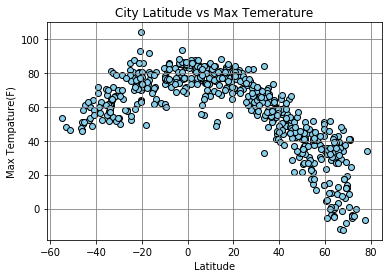

In [134]:
#create scatter plt
plt.scatter(weather_df['Latitude'],weather_df['Max Tempature'],facecolor='skyblue',edgecolor='black')

#add grid
plt.grid(axis='both',color='grey')

#add labels
plt.xlabel('Latitude')
plt.ylabel('Max Tempature(F)')
plt.title('City Latitude vs Max Temerature')
plt.show()

#### Latitude vs. Humidity Plot

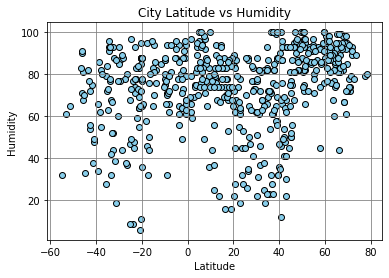

In [136]:
#create scatter plt
plt.scatter(weather_df['Latitude'],weather_df['Humidity'],facecolor='skyblue',edgecolor='black')

#add grid
plt.grid(axis='both',color='grey')

#add labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

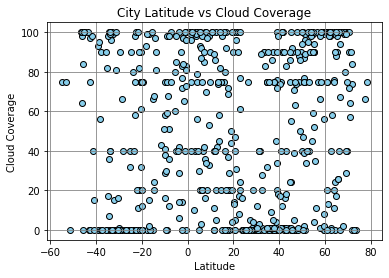

In [138]:
#create scatter plt
plt.scatter(weather_df['Latitude'],weather_df['Cloud Coverage'],facecolor='skyblue',edgecolor='black')

#add grid
plt.grid(axis='both',color='grey')

#add labels
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage')
plt.title('City Latitude vs Cloud Coverage')
plt.show()

#### Latitude vs. Wind Speed Plot

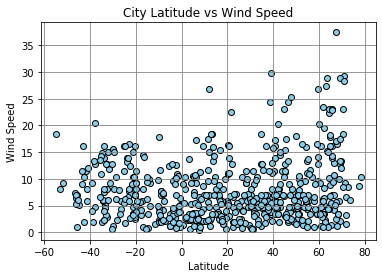

In [139]:
#create scatter plt
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'],facecolor='skyblue',edgecolor='black')

#add grid
plt.grid(axis='both',color='grey')

#add labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')
plt.show()